# Imports

In [1]:
import pandas as pd

from coordinate_matching import *
import time

# Code

# Example 1: Artificial data

In [2]:
ra1 = np.random.uniform()

# Example 2: Real data

We will match MaNGA with Galaxy Zoo DECaLS on their coordinates.

In [31]:
df_manga = pd.read_csv('data/manga_coordinates.csv')
df_gz = pd.read_csv('data/gzdecals_coordinates.csv')

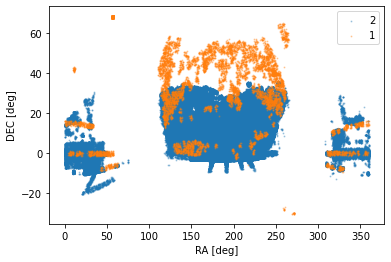

In [35]:
plot_on_sky([df_manga['objra'],df_manga['objdec']],
            [df_gz['ra'],df_gz['dec']])

In [34]:
def plot_on_sky(catalog_A, catalog_B, labels = [1,2], markersize = 1, alpha = 0.3):
    assert len(catalog_A) == 2 and len(catalog_B) == 2, 'Catalog_A must be a list of 2 arrays. First array is ra, second is dec. Idem for catalog_B. Units for ra/dec must be deg.'
    
    # Transform to np.array
    catalog_A = [np.array(catalog_A[0]), np.array(catalog_A[1])]
    catalog_B = [np.array(catalog_B[0]), np.array(catalog_B[1])]

    plt.scatter(catalog_B[0], catalog_B[1], s=markersize, alpha=alpha, label = labels[1]) #plotting 
    plt.scatter(catalog_A[0], catalog_A[1], s=markersize, alpha=alpha, label = labels[0])

    plt.xlabel('RA [deg]')
    plt.ylabel('DEC [deg]')
    
    plt.legend()
    
    plt.show()

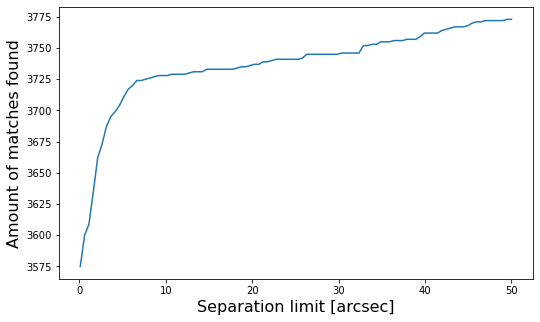

It took 0.85 seconds.


In [5]:
start_time = time.time()

catalog_match_plot_separation_radius([df_manga['objra'],df_manga['objdec']],
                                     [df_gz['ra'],df_gz['dec']])


print(f'It took {np.round(time.time() - start_time,2)} seconds.')

In [6]:

idx, _, _, _ = match_catalogs([df_manga['objra'],df_manga['objdec']],
               [df_gz['ra'],df_gz['dec']],
               limit = 5) # can vary, depending on how conservative you want to be.

  0%|          | 0/313789 [00:00<?, ?it/s]

  0%|          | 0/11273 [00:00<?, ?it/s]

In [7]:
# TODO: put this in function too

df_gz = df_gz.reset_index()

# Remove all where idx is np.nan, so no match found.
ind_selection = np.where(np.isnan(idx))[0]
df_manga = df_manga.drop(ind_selection,axis=0)
df_manga = df_manga.reset_index(drop=True)
idx_denan = [int(i) for i in idx if ~np.isnan(i)]

# Match data to it
df_manga['index'] = list(df_gz['index'][idx_denan])
df_merged = df_manga.merge(df_gz,left_on='index',right_on='index', how='inner', suffixes = ('_manga','_gz'))
df_merged = df_merged.drop(columns=['index'])
print('We have ' + str(len(df_merged))+ ' galaxies left.') #12509

We have 3666 galaxies left.


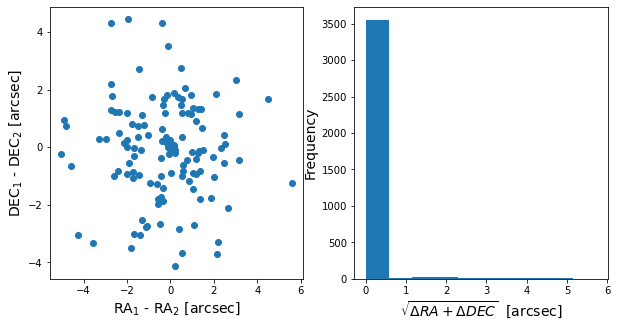

In [8]:
plot_coordinate_difference([df_merged['ra'], df_merged['dec']], [df_merged['objra'], df_merged['objdec']])

In [9]:
plt.scatter([df_merged['ra'], df_merged['dec']])

TypeError: scatter() missing 1 required positional argument: 'y'

TODO: Check why not a perfect match. But my guess: some 'true' matches might fall outside the limit that we chose. Alternatively, some are matched incorrectly, because another target happened to be closer by. Nothing that we can do about this, unfortunately.